### Aliya Izmailova BD-1902

### HW 9-10

## Introduction

I use dataset from kaggle.com website, in particular https://www.kaggle.com/shubh0799/churn-modelling.

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
from sklearn import preprocessing

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import StandardScaler

import missingno as msno

Here is explanation of each attribute in the table, which is shown below

* **RowNumber** - Row number
* **CustomerId** - Unique customer id
* **Surname** - Customer's Surname
* **CreditScore** - Their credit score
* **Geography** - Which Country they belong to
* **Gender** - Gender (female, male)
* **Age** - Customer's age
* **Tenure** - The time of bond with company 
* **Balance** - The amount left with them
* **NumOfProducts** - The products they own
* **HasCrCard** - binary has or has not card
* **IsActiveMember** - active or not(binary)
* **EstimatedSalary** - estimated salary of the customer
* **Exited** - is exited or not

In [2]:
#read csv file
data = pd.read_csv('churn.csv')

In [3]:
data = data.drop(['RowNumber'], axis=1)

In [4]:
data.shape

(10000, 13)

In [5]:
data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619.0,France,Female,42.0,2.0,NaN,1.0,NaN,1.0,101348.88,1
1,15647311,Hill,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0
2,15619304,Onio,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1
3,15701354,Boni,699.0,France,Female,39.0,1.0,NaN,2.0,0.0,0.0,93826.63,0
4,15737888,Mitchell,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771.0,France,Male,39.0,5.0,0.00,2.0,1.0,0.0,96270.64,0
9996,15569892,Johnstone,516.0,France,Male,35.0,10.0,57369.61,1.0,1.0,1.0,101699.77,0
9997,15584532,Liu,709.0,France,Female,36.0,7.0,NaN,1.0,0.0,1.0,42085.58,1
9998,15682355,Sabbatini,772.0,Germany,Male,42.0,3.0,75075.31,2.0,1.0,0.0,92888.52,1


In [6]:
data_dropped = data

Now, we see the same number of record but with deleting unnecessary columns, all in all we have 13 columns.

## Main

### Data Preprocessing

#### Missing values

In [7]:
#printing a sum of null values in each column
print(data.isnull().sum())

CustomerId           0
Surname              0
CreditScore         33
Geography            0
Gender               0
Age                 62
Tenure              18
Balance            170
NumOfProducts       18
HasCrCard           26
IsActiveMember      15
EstimatedSalary     36
Exited               0
dtype: int64


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      9967 non-null   float64
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              9938 non-null   float64
 6   Tenure           9982 non-null   float64
 7   Balance          9830 non-null   float64
 8   NumOfProducts    9982 non-null   float64
 9   HasCrCard        9974 non-null   float64
 10  IsActiveMember   9985 non-null   float64
 11  EstimatedSalary  9964 non-null   float64
 12  Exited           10000 non-null  int64  
dtypes: float64(8), int64(2), object(3)
memory usage: 1015.8+ KB


As a result, there are not null values. Each column is full of needed values.

**Detect Missing Values** in Balance and Estimated Salary columns

Because some Balance(Estimated Salary) values can be simply equal to zero

In [9]:
data['Balance'][data['Balance']==0]

74      0.0
124     0.0
126     0.0
128     0.0
130     0.0
       ... 
9977    0.0
9983    0.0
9992    0.0
9994    0.0
9995    0.0
Name: Balance, Length: 3450, dtype: float64

In [10]:
data['EstimatedSalary'][data['EstimatedSalary']==0]

Series([], Name: EstimatedSalary, dtype: float64)

From tese results it seen that 3450 of Customers have zero Balance and none of them have not zero Estimated Salary

Also, the customer cannot be Active Customer and has zero Balance at the same time. So, we need to isedtify those, who are Active and has zero Balance.

In [11]:
active_array = data['IsActiveMember'][data['IsActiveMember']==1].index.values
balance_array = data['Balance'][data['Balance']==0].index.values
list1 = [value for value in balance_array if value in active_array]

In [12]:
data['Balance'].loc[data['Balance'].index.isin(list1)] = np.nan

C:\Users\Aliya\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [13]:
data.isna().sum()

CustomerId            0
Surname               0
CreditScore          33
Geography             0
Gender                0
Age                  62
Tenure               18
Balance            1959
NumOfProducts        18
HasCrCard            26
IsActiveMember       15
EstimatedSalary      36
Exited                0
dtype: int64

Now we converted balance to NaN if the Balance  = 0 and if the user is Active

<AxesSubplot:>

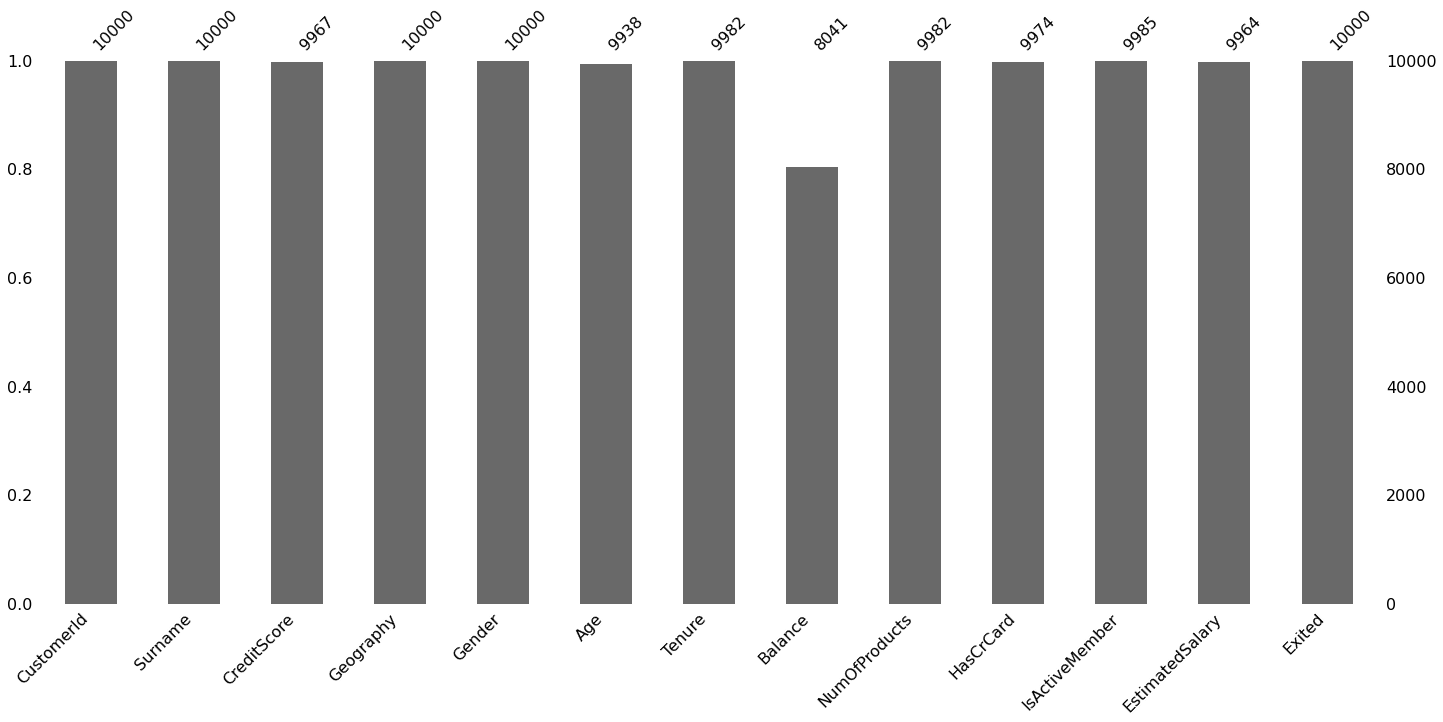

In [14]:
msno.bar(data)

In [15]:
data_dropped = data.dropna(how='any')

In [16]:
data_dropped = data_dropped.drop(['CustomerId', 'Surname'], 1)

In [17]:
data_dropped

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,608.0,Spain,Female,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58,0
2,502.0,France,Female,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57,1
4,850.0,Spain,Female,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10,0
5,645.0,Spain,Male,44.0,8.0,113755.78,2.0,1.0,0.0,149756.71,1
7,376.0,Germany,Female,29.0,4.0,115046.74,4.0,1.0,0.0,119346.88,1
...,...,...,...,...,...,...,...,...,...,...,...
9993,644.0,France,Male,28.0,7.0,155060.41,1.0,1.0,0.0,29179.52,0
9994,800.0,France,Female,29.0,2.0,0.00,2.0,0.0,0.0,167773.55,0
9995,771.0,France,Male,39.0,5.0,0.00,2.0,1.0,0.0,96270.64,0
9996,516.0,France,Male,35.0,10.0,57369.61,1.0,1.0,1.0,101699.77,0


#### Filling Up Missing values

Simple Imputer

In [18]:
from sklearn.impute import SimpleImputer 

In [19]:
data_mean = data['Balance'].copy(deep=True)
mean_imputer = SimpleImputer(strategy='mean') 

In [20]:
data_mean = data_mean.values.reshape(-1, 1)


In [21]:
df = mean_imputer.fit_transform(data_mean)

In [22]:
df

array([[ 95078.73952742],
       [ 83807.86      ],
       [159660.8       ],
       ...,
       [ 95078.73952742],
       [ 75075.31      ],
       [130142.79      ]])

In [23]:
data['Balance'] = df

In [24]:
data.isna().sum()

CustomerId          0
Surname             0
CreditScore        33
Geography           0
Gender              0
Age                62
Tenure             18
Balance             0
NumOfProducts      18
HasCrCard          26
IsActiveMember     15
EstimatedSalary    36
Exited              0
dtype: int64

In [25]:
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619.0,France,Female,42.0,2.0,95078.739527,1.0,NaN,1.0,101348.88,1
1,15647311,Hill,608.0,Spain,Female,41.0,1.0,83807.860000,1.0,0.0,1.0,112542.58,0
2,15619304,Onio,502.0,France,Female,42.0,8.0,159660.800000,3.0,1.0,0.0,113931.57,1
3,15701354,Boni,699.0,France,Female,39.0,1.0,95078.739527,2.0,0.0,0.0,93826.63,0
4,15737888,Mitchell,850.0,Spain,Female,43.0,2.0,125510.820000,1.0,1.0,1.0,79084.10,0


In [26]:
data_mode = data['CreditScore'].copy(deep=True)
mode_imputer = SimpleImputer(strategy='most_frequent')
data_mode = data_mode.values.reshape(-1, 1)
df2 = mode_imputer.fit_transform(data_mode)

In [27]:
data['CreditScore'] = df2

In [28]:
data['CreditScore'].isna().sum()

0

**Age**

In [29]:
data['IsActiveMember'] = data['IsActiveMember'].replace(np.nan, 1)

In [30]:
data['IsActiveMember'].isna().sum()

0

In [31]:
data['HasCrCard'] = data['HasCrCard'].replace(np.nan, 1)

In [32]:
df_mean = data['EstimatedSalary'].copy(deep=True)
mode_imputer = SimpleImputer(strategy='mean')
df_mean = df_mean.values.reshape(-1, 1)
df3 = mode_imputer.fit_transform(df_mean)

In [33]:
data['EstimatedSalary'] = df3

In [34]:
df4_mean = data['Age'].copy(deep=True)
mode_imputer = SimpleImputer(strategy='mean')
df4_mean = df4_mean.values.reshape(-1, 1)
df4 = mode_imputer.fit_transform(df4_mean)
data['Age'] = df4

In [35]:
df5_mean = data['Tenure'].copy(deep=True)
mode_imputer = SimpleImputer(strategy='most_frequent')
df5_mean = df5_mean.values.reshape(-1, 1)
df5 = mode_imputer.fit_transform(df5_mean)
data['Tenure'] = df5

In [36]:
df6_mean = data['NumOfProducts'].copy(deep=True)
mode_imputer = SimpleImputer(strategy='most_frequent')
df6_mean = df6_mean.values.reshape(-1, 1)
df6 = mode_imputer.fit_transform(df6_mean)
data['NumOfProducts'] = df6

# Data Exploration

## Oulier Detection

In [37]:
def outliers(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3-q1
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x<floor) | (x>ceiling)])
    outlier_values = list(x[outlier_indices])
    return outlier_indices, outlier_values

In [38]:
ind, val = outliers(data['Age'])
print(np.sort(val))

[ 0.  7. 63. 63. 63. 63. 63. 63. 63. 63. 63. 63. 63. 63. 63. 63. 63. 63.
 63. 63. 63. 63. 63. 63. 63. 63. 63. 63. 63. 63. 63. 63. 63. 63. 63. 63.
 63. 63. 63. 63. 63. 63. 64. 64. 64. 64. 64. 64. 64. 64. 64. 64. 64. 64.
 64. 64. 64. 64. 64. 64. 64. 64. 64. 64. 64. 64. 64. 64. 64. 64. 64. 64.
 64. 64. 64. 64. 64. 64. 64. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65. 65.
 65. 65. 65. 65. 65. 65. 65. 66. 66. 66. 66. 66. 66. 66. 66. 66. 66. 66.
 66. 66. 66. 66. 66. 66. 66. 66. 66. 66. 66. 66. 66. 66. 66. 66. 66. 66.
 66. 66. 66. 66. 66. 67. 67. 67. 67. 67. 67. 67. 67. 67. 67. 67. 67. 67.
 67. 67. 67. 67. 67. 67. 67. 67. 67. 67. 67. 67. 67. 67. 67. 67. 67. 67.
 67. 67. 67. 67. 67. 67. 68. 68. 68. 68. 68. 68. 68. 68. 68. 68. 68. 68.
 68. 68. 68. 68. 68. 68. 68. 69. 69. 69. 69. 69. 69. 69. 69. 69. 69. 69.
 69. 69. 69. 69. 69. 69. 69. 69. 69. 69. 69. 70. 70. 70. 70. 70. 70. 70.
 70. 70. 70. 70. 70. 70. 70. 70. 70. 70. 70. 71. 71. 71. 71. 71. 71. 71.
 71. 71. 71. 71. 71. 71. 71. 71. 71. 71. 71. 71. 71

In [39]:
data['Age'] = data['Age'].drop(val, axis=0)

In [40]:
ind, val = outliers(data['Tenure'])
print(np.sort(val))

[]


In [41]:
ind1, val1 = outliers(data['CreditScore'])
print(np.sort(val1))

[350. 350. 350. 350. 350. 351. 358. 359. 363. 365. 367. 373. 376. 376.
 382.]


In [42]:
data['CreditScore'] = data['CreditScore'].drop(val1, axis=0)

In [43]:
data = data.dropna(how='any')

<AxesSubplot:>

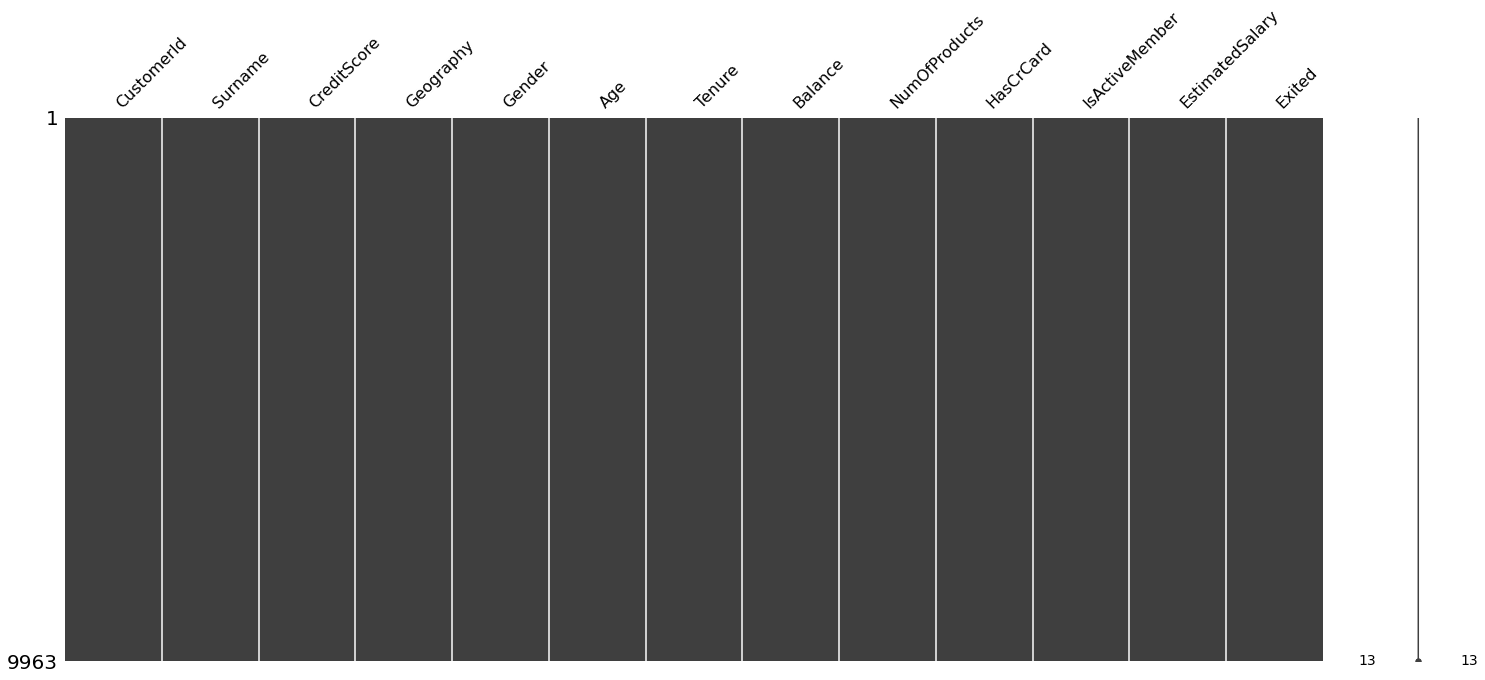

In [44]:
msno.matrix(data)

#### Data types

In [45]:
print(data.dtypes)

CustomerId           int64
Surname             object
CreditScore        float64
Geography           object
Gender              object
Age                float64
Tenure             float64
Balance            float64
NumOfProducts      float64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object


## Feature Engineering

Here I use binary encoding and one-hot for categorical data

In order to make a model, which is requires only numerical data

**Identify the classes that we have in each column and their number**

In [46]:
data['Gender'].value_counts()

Male      5443
Female    4520
Name: Gender, dtype: int64

In [47]:
data['Geography'].value_counts()

France     4998
Germany    2495
Spain      2470
Name: Geography, dtype: int64

#### Encoding categorical variables — binary

Here, only one column that requaries convertion to binary: Gender(because there are only two classes: male and female)

In [48]:
enc = preprocessing.LabelEncoder()
data['Gender'] = enc.fit_transform(data['Gender'])

<ipython-input-48-38d72347f33e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Gender'] = enc.fit_transform(data['Gender'])


In [49]:
#check for working well
print(data[['Gender']].iloc[10:15])

    Gender
12       0
13       0
14       0
15       1
16       1


#### Encoding categorical variables — one-hot

In [50]:
new1_data = pd.get_dummies(data['Geography'], prefix='Geography')

In [51]:
data = pd.concat([data, new1_data], axis=1)

**Concatenation** of all dummy values that we got in previous iteration

In [52]:
data = data.drop(['CustomerId', 'Surname', 'Geography'], axis=1)

In [53]:
data

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
1,608.0,0,41.0,1.0,83807.860000,1.0,0.0,1.0,112542.580000,0,0,0,1
2,502.0,0,42.0,8.0,159660.800000,3.0,1.0,0.0,113931.570000,1,1,0,0
3,699.0,0,39.0,1.0,95078.739527,2.0,0.0,0.0,93826.630000,0,1,0,0
4,850.0,0,43.0,2.0,125510.820000,1.0,1.0,1.0,79084.100000,0,0,0,1
5,645.0,1,44.0,8.0,113755.780000,2.0,1.0,0.0,149756.710000,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771.0,1,39.0,5.0,0.000000,2.0,1.0,0.0,96270.640000,0,1,0,0
9996,516.0,1,35.0,10.0,57369.610000,1.0,1.0,1.0,101699.770000,0,1,0,0
9997,709.0,0,36.0,7.0,95078.739527,1.0,0.0,1.0,42085.580000,1,1,0,0
9998,772.0,1,42.0,3.0,75075.310000,2.0,1.0,0.0,92888.520000,1,0,1,0


In [54]:
print(data.dtypes)

CreditScore          float64
Gender                 int32
Age                  float64
Tenure               float64
Balance              float64
NumOfProducts        float64
HasCrCard            float64
IsActiveMember       float64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object


# Feature Selection

# Univariate Selection

In [55]:
data.isna().sum()

CreditScore          0
Gender               0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
Geography_France     0
Geography_Germany    0
Geography_Spain      0
dtype: int64

In [56]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [57]:
X = data.drop(['Exited'],axis=1)
y = data['Exited']

In [58]:
bestFeatures = SelectKBest(score_func=chi2, k=7)
fit = bestFeatures.fit(X, y)

In [59]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [60]:
#concat two dataframes
featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ['Col', 'Score']

In [61]:
featureScores.sort_values(by='Score', ascending=False)

,Col,Score
4,Balance,740051.319622
8,EstimatedSalary,49540.061124
2,Age,2256.617782
10,Geography_Germany,225.805026
7,IsActiveMember,116.289272
0,CreditScore,102.392104
9,Geography_France,55.335528
1,Gender,51.637516
11,Geography_Spain,20.439958
5,NumOfProducts,5.623656


In [62]:
print(featureScores.nlargest(8, 'Score'))

                  Col          Score
4             Balance  740051.319622
8     EstimatedSalary   49540.061124
2                 Age    2256.617782
10  Geography_Germany     225.805026
7      IsActiveMember     116.289272
0         CreditScore     102.392104
9    Geography_France      55.335528
1              Gender      51.637516


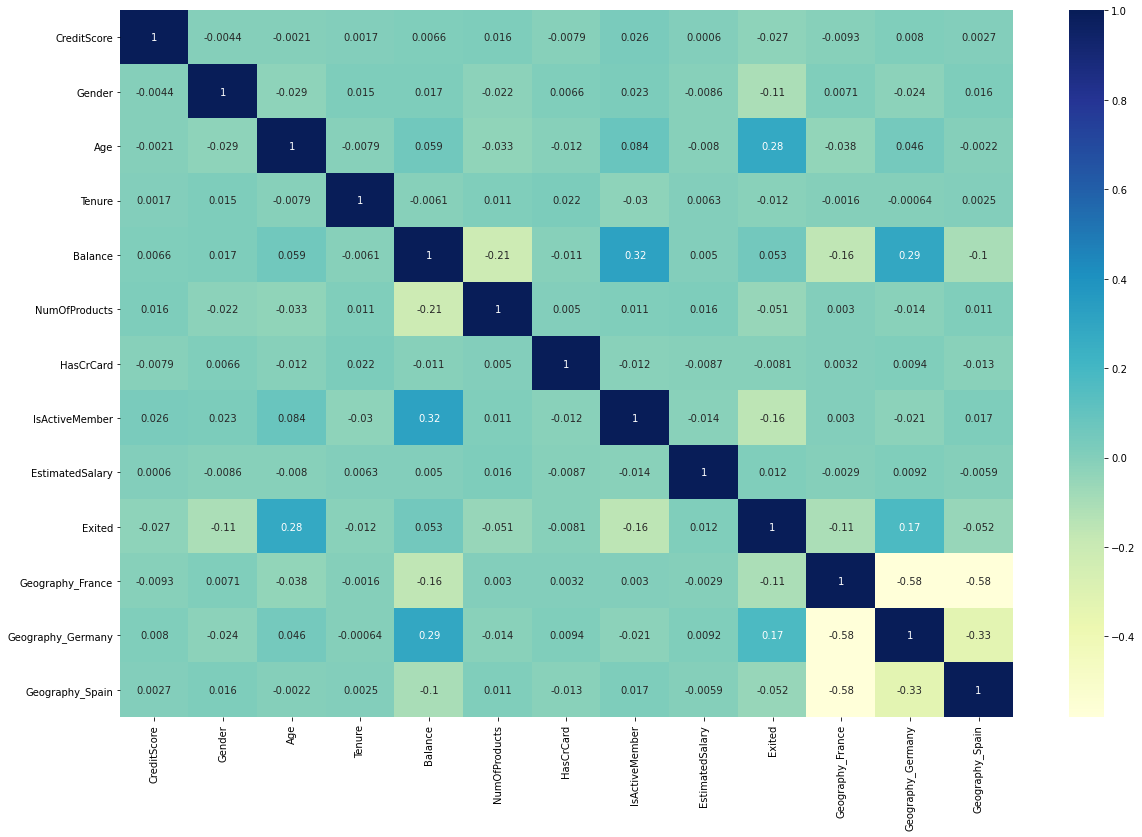

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
#get correlation of each feature in the dataset
correlation = data.corr()
top_correlation = correlation.index
plt.figure(figsize = (20, 13))
g = sns.heatmap(data[top_correlation].corr(), annot = True, cmap="YlGnBu")

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7, random_state = 1)

selected_features = bestFeatures.fit(X_train, y_train)
selected_indices = selected_features.get_support(indices = True)
selected_cols = [X.columns[i] for i in selected_indices]

X_train_selected = X_train[selected_cols]
X_test_selected = X_test[selected_cols]

In [65]:
selected_cols

['CreditScore',
 'Age',
 'Balance',
 'IsActiveMember',
 'EstimatedSalary',
 'Geography_France',
 'Geography_Germany']

In [66]:
y_train

8204    0
811     0
3420    0
4438    0
3589    0
       ..
2932    1
7850    0
942     1
5229    0
262     0
Name: Exited, Length: 2988, dtype: int64

# Modelling

Here I will use inbuilt functions of sklearn library

In [67]:
def find_model(X_train, y_train, X_test, y_test):
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_pred = [x[1] for x in model.predict_proba(X_test)]
    y_pred = np.array(y_pred)
    acur = accuracy_score(y_test, y_pred.round(), normalize=True)
    
    return acur

In [68]:
acur_processed = find_model(X_train_selected, y_train, X_test_selected, y_test)
print(acur_processed.round(1))

0.8


# Unprocessed

**Original Data**

#### Logistic Regression Model

In [75]:
#Logistic regression
lr = LogisticRegression(max_iter = 100)
lr.fit(X_train_selected, y_train)
pred = lr.predict(X_test_selected)
acc_score_selected = accuracy_score(y_test, pred) #accuracy score
acc_score_selected.round(2) #for logistic regression

0.8

#### KNeighborsClassifier (lookig for 5 nearest neighbors)

In [76]:
knn = KNeighborsClassifier()
#X_train, X_test, y_train, y_test = train_test_split(X, y) #splitting the dataset

knn.fit(X_train_selected, y_train) #fitting train set
score2_selected = knn.score(X_test_selected, y_test)
print(score2_selected.round(2)) #score

0.76


**Standartization** using inbuilt sklearn class

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7, random_state = 1)

selected_features = bestFeatures.fit(X_train, y_train)
selected_indices = selected_features.get_support(indices = True)
selected_cols = [X.columns[i] for i in selected_indices]

X_train_selected = X_train[selected_cols]
X_test_selected = X_test[selected_cols]

In [78]:
scaler = StandardScaler() #ready function
X_st = scaler.fit_transform(X_train_selected)

In [79]:
X_st #standartized data

array([[ 7.34623998e-01, -4.66677418e-01,  7.51178801e-01, ...,
        -3.38069473e-01,  9.78150293e-01, -5.79926588e-01],
       [ 2.91737959e-01,  2.46626324e+00,  7.98633384e-01, ...,
         1.57612309e+00, -1.02233778e+00, -5.79926588e-01],
       [ 2.81438284e-01, -7.50510385e-01,  2.31668859e-03, ...,
        -1.67978535e+00,  9.78150293e-01, -5.79926588e-01],
       ...,
       [-2.84966302e+00,  6.68654450e-01, -1.90788775e+00, ...,
         1.00088706e+00,  9.78150293e-01, -5.79926588e-01],
       [ 2.29939907e-01, -3.72066429e-01,  2.31668859e-03, ...,
        -7.49724067e-01,  9.78150293e-01, -5.79926588e-01],
       [-9.85421781e-01, -6.55899396e-01,  1.80260318e+00, ...,
        -1.47448702e+00,  9.78150293e-01, -5.79926588e-01]])

In [80]:
X_test_st = scaler.fit_transform(X_test_selected)

In [81]:
#KNN with standartized data
X_train, X_test, y_train, y_test = train_test_split(X_st, y_train)

# Fit the k-nearest neighbors model to the training data
knn.fit(X_train, y_train)

# SCore the model on the test data
score3 = knn.score(X_test, y_test)
print(score3)

0.7925033467202142


In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7, random_state = 1)

selected_features = bestFeatures.fit(X_train, y_train)
selected_indices = selected_features.get_support(indices = True)
selected_cols = [X.columns[i] for i in selected_indices]

X_train_selected = X_train[selected_cols]
X_test_selected = X_test[selected_cols]

In [83]:
#Logistic regression
X_train, X_test,y_train,y_test=train_test_split(X_st, y_train, test_size = 0.1)

lr = LogisticRegression(max_iter=10000)
lr.fit(X_train,y_train)
pred2 = lr.predict(X_test)
score4 = accuracy_score(y_test, pred2)
print(score4)

0.8260869565217391


In [84]:
#Logistic regression
X_train, X_test, y_train, y_test = train_test_split(X, y) #splitting the dataset
lr = LogisticRegression(max_iter = 50)
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
acc_score = accuracy_score(y_test, pred) #accuracy score
acc_score #for logistic regression

0.7936571657968687

In [85]:
knn = KNeighborsClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y) #splitting the dataset

knn.fit(X_train, y_train) #fitting train set
score2 = knn.score(X_test, y_test)
print(score2.round(3)) #score

0.766


# Raw

In [86]:
scaler = StandardScaler() #ready function
Xd_st = scaler.fit_transform(Xd)

NameError: name 'Xd' is not defined

In [ ]:
Xd_st

In [ ]:
#Logistic regression
Xd_train, Xd_test,yd_train,yd_test=train_test_split(Xd_st, yd, test_size = 0.2)

lr = LogisticRegression(max_iter=10000)
lr.fit(Xd_train,yd_train)
pred2 = lr.predict(Xd_test)
score4d = accuracy_score(yd_test, pred2)
print(score4d)

In [ ]:
#KNN with standartized data
Xd_train, Xd_test, yd_train, yd_test = train_test_split(Xd_st, yd)

# Fit the k-nearest neighbors model to the training data
knn.fit(Xd_train, yd_train)

# SCore the model on the test data
score3d = knn.score(Xd_test, yd_test)
print(score3d)

### Comparing scores

In [87]:
arr = np.array([acc_score, score2, score3, score4])

In [88]:
arr

array([0.79365717, 0.765556  , 0.79250335, 0.82608696])

In [89]:
df = pd.DataFrame(np.array([arr]),
                   columns=['LogUnst', 'KNN_Unst', 'KNN_St', 'LogSt'])

In [90]:
df

,LogUnst,KNN_Unst,KNN_St,LogSt
0,0.793657,0.765556,0.792503,0.826087


In [91]:
df['LogUnst'] > df['KNN_Unst']

0    True
dtype: bool

In [92]:
df['LogSt']>df['KNN_St']

0    True
dtype: bool

In [93]:
#then we take two largest and compare
df['LogUnst'] > df['LogSt']

0    False
dtype: bool

## Conclusion

The result is that KNN's score of stardartized data is the highest one

Its accuracy score is 0.836.


All in all I enhanced the accuracy by 11% with prediction and standartizing data.